In [1]:
!pip install statsmodels
!pip install sklearn

  Using cached statsmodels-0.14.0-cp39-cp39-win_amd64.whl (9.4 MB)


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Using cached sklearn-0.0.post7.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [18 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  
  If the previous advice does not cover your use case, feel 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [3]:
db = pd.read_csv('./Biomass_History.csv')
db.head()

Index  Latitude  Longitude       2010       2011       2012       2013  \
0      0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070   
1      1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2      2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3      3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4      4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   

        2014       2015       2016        2017  
0  10.788374   6.647325   7.387925    5.180296  
1  34.419411  27.361908  40.431847   42.126945  
2  70.917908  42.517117  59.181629   73.203232  
3  93.513924  70.203171  74.536720  101.067352  
4  19.534035  19.165791  16.531315   26.086885

In [4]:
avg = []
for i in range(len(db)):
    row_i = db.iloc[i]
    curr_avg = row_i[3: 11].mean()
    avg.append(curr_avg)

In [5]:
avg = np.array(avg)
print(avg.mean())

141.21529332518153


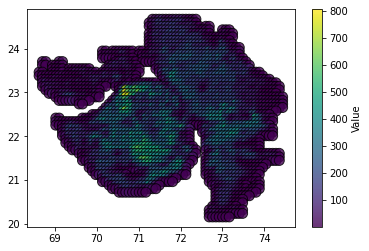

In [6]:
lat = db['Latitude']
lon = db['Longitude']
plt.scatter(lon, lat, c = avg, cmap='viridis', s=100, edgecolor='k', alpha=0.8)
plt.colorbar(label='Value')

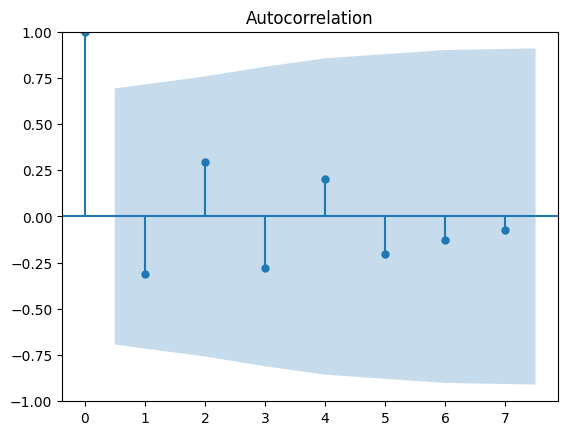

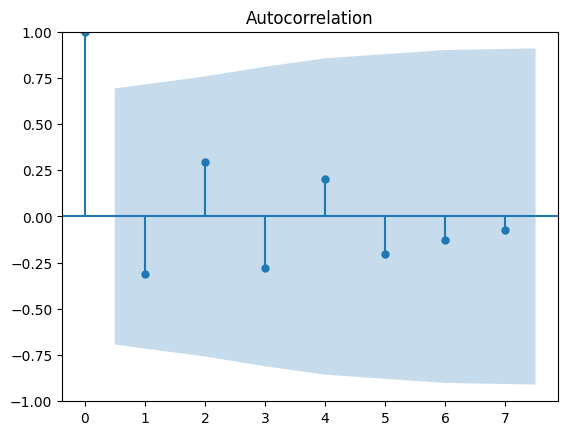

In [ ]:
# Determining the values of p d q for ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
row_ = db.iloc[0]
row_ = row_.drop(['Index', 'Latitude', 'Longitude'], axis=0)  
plot_acf(row_)

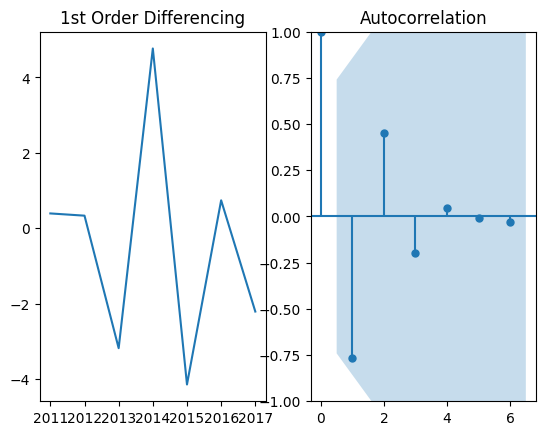

In [ ]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(row_.diff())

ax2 = f.add_subplot(122)
plot_acf(row_.diff().dropna(), ax=ax2)
plt.show()

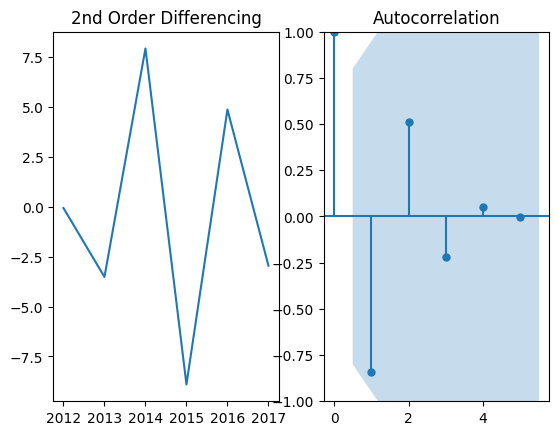

In [ ]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(row_.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(row_.diff().diff().dropna(), ax=ax2)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(row_.dropna())
print('p-value: ', result[1])

result = adfuller(row_.diff().dropna())
print('p-value: ', result[1])

result = adfuller(row_.diff().diff().dropna())
print('p-value: ', result[1])

p-value:  0.046058383726039966
p-value:  4.327995182523914e-07
p-value:  0.11646388396403418


In [ ]:
def predict_biomass(index):
    row_ = db.iloc[index]
    row_ = row_.drop(['Index', 'Latitude', 'Longitude'], axis=0)  
    # print(row_)
    # Create an ARIMA model
    model = sm.tsa.ARIMA(row_, order=(1, 1, 2))

    # Fit the model to the data
    results = model.fit()

    # Make predictions (forecast) for the next 'n' steps
    forecast_steps = 1
    forecast = results.forecast(steps=forecast_steps)

    # The 'forecast' variable now contains the predicted values for the next 'forecast_steps' time steps
    return forecast[0]
predict_biomass(1)

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


44.268970977206045

In [ ]:
# BIOMASS FORECAST 

In [ ]:
ans = []
for i in range(len(db)):
    ans.append(predict_biomass(i))
ans

  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred f

[7.368223225486748,
 44.269756000785506,
 43.0699015187844,
 63.113251502891416,
 12.985756366082423,
 16.564518633061432,
 45.24123328595962,
 56.33669085942512,
 27.98839273807672,
 25.683358155783303,
 11.078226982810452,
 6.025667923126855,
 7.151295504407621,
 0.15671798904971526,
 0.4141837481062899,
 24.668956230355064,
 88.45259112370395,
 161.84794441155995,
 134.7923853094986,
 76.8791829675646,
 66.68000952579918,
 109.08819191683294,
 123.9118663508022,
 103.72909122385299,
 112.66124153615961,
 72.37208460539011,
 41.515059711474564,
 30.116593751348038,
 4.128109882264746,
 0.2527586857372363,
 28.944584026384057,
 91.26928991090001,
 149.42303637561844,
 122.86260216988549,
 126.31862406654612,
 111.2377755111003,
 159.0225360389136,
 154.51816434674367,
 83.67583900628519,
 60.34741041750927,
 100.82105016990366,
 75.80980261918823,
 96.12607653371481,
 22.36248580962749,
 5.89292174913263,
 0.20881241981978427,
 0.6209889684905543,
 16.328766811137253,
 84.393205466324

In [ ]:
ans = np.array(ans)
total_forecasted_biomass = np.sum(ans)
total_forecasted_biomass

338638.7838525866

In [11]:
# CONSTRAINTS
mx_num_depots = 25
mx_num_refineries = 5
mx_pellets = 100000
mx_biomass = 20000

In [12]:
dm = pd.read_csv('./Distance_Matrix.csv')
dm.head()

Unnamed: 0        0        1        2        3        4        5        6  \
0           0   0.0000  11.3769  20.4557  38.1227  45.3810  54.9915  78.6108   
1           1  11.3769   0.0000   9.0788  28.9141  36.1724  45.7829  69.4022   
2           2  20.4557   9.0788   0.0000  22.3791  29.6374  39.2478  62.8671   
3           3  38.1227  28.9141  22.3791   0.0000  11.8343  23.5413  41.8396   
4           4  45.3810  36.1724  29.6374  11.8343   0.0000  11.7070  24.3986   

          7         8  ...      2408      2409      2410      2411      2412  \
0  118.6750  102.6639  ...  683.8771  687.6310  697.3246  669.3962  667.6788   
1   78.2329   93.4553  ...  681.6295  685.3833  695.0769  667.1485  665.4311   
2   71.6979   86.9203  ...  682.2323  685.9861  695.6796  667.7513  666.0339   
3   50.6703   65.8927  ...  681.4226  685.1765  694.8701  666.9417  665.2243   
4   33.2293   53.9901  ...  663.9816  667.7355  677.4291  649.5007  647.7833   

       2413      2414      2415      2416      2417  
0  665.5775  662.0291  665.9655  673.2073  681.4235  
1  663.3298  659.7815  663.7178  670.9596  679.1758  
2  663.9326  660.3843  664.3206  671.5623  679.7786  
3  663.1230  659.5746  663.5110  670.7528  678.9690  
4  645.6820  642.1336  646.0700  653.3118  661.5280  

[5 rows x 2419 columns]

In [13]:
dm = np.array(dm)

In [14]:
# APPROACH  -> DIVIDE THE MAP INTO 20 AREAS AND THEN CALCULATE THE BEST SPOT FOR EACH AREA

In [15]:
def getDepotLocations(db, depots=20):
    areas = np.array_split(db, depots)
    overall_cost = 0
    locations = []
    sites_left = []

    for ind, area in enumerate(areas):           # Iterating areas 
        options = len(area)
        st = area['Index'].iloc[0]           # Use .iloc[0] to access the first element of the 'Index' column
        en = area['Index'].iloc[options - 1] # Use .iloc[options - 1] to access the last element of the 'Index' column
        
        min_cost = 1e6
        best_loc = 0
        for i in range(st, en+1):   # Iterate harvesting sites that fall under the st & en points of that area
            curr_cost = 0
            temp = []
            for j in range(st, en+1):
                curr_cost += dm[i][j]
                if curr_cost >= 20000:
                    # curr_cost -= dm[i][j]
                    temp.append([ind,j, dm[i][j]])   #Area number, site number, cost
            if curr_cost < min_cost:
                min_cost = curr_cost
                best_loc = i
                if len(temp) != 0:
                    sites_left.append(temp)
            else:
                temp.clear()
        # print("Best spot for area {} is: {} with a cost of {}".format(ind, best_loc, min_cost))
        overall_cost += min_cost
        locations.append(best_loc)
    return locations, overall_cost, sites_left

# def getDepotLocations(db, depots=20):
#     areas = np.array_split(db, depots)
#     overall_cost = 0
#     locations = []
#     sites_left = []

#     for ind, area in enumerate(areas):
#         options = len(area)
#         st = area['Index'].iloc[0]
#         en = area['Index'].iloc[options - 1]
        
#         min_cost = float('inf')
#         best_loc = None
#         best_temp = []
        
#         for i in range(st, en+1):
#             temp = []
#             temp_cost = 0
            
#             for j in range(st, en+1):
#                 if temp_cost + dm[i][j] < 20000:  # Check if adding the distance exceeds 20,000
#                     temp_cost += dm[i][j]
#                     temp.append([ind, j, dm[i][j]])
            
#             if temp_cost < min_cost:
#                 min_cost = temp_cost
#                 best_loc = i
#                 best_temp = temp
                
#         if best_loc is not None:
#             sites_left.extend(best_temp)
#             locations.append(best_loc)
#             overall_cost += min_cost
            
#     return locations, overall_cost, sites_left


In [79]:
def extract_coorindates(locations):
    coordinates = []
    lat_coorindates = []
    lon_coorindates = []
    for i in locations:
        lat_coorindates.append(db.iloc[i]['Latitude'])
        lon_coorindates.append(db.iloc[i]['Longitude'])
    coordinates.append([lat_coorindates, lon_coorindates])
    return coordinates

In [17]:
def getOptimalResults(const1, function1):
    optimal_results = {}
    for i in range(1, const1+1):
        locations, cost, sites_left = function1(db, i)
        optimal_results[i] = cost
    optimal_result = min(optimal_results, key=optimal_results.get)
    result = function1(db, depots=optimal_result)
    return result

In [18]:
optimal_result = getOptimalResults(mx_num_depots, getDepotLocations)   # Locations, cost, sites_left
cost_transport_to_depot = optimal_result[1]
print(optimal_result)

([38, 132, 256, 340, 424, 538, 613, 796, 812, 929, 1060, 1112, 1225, 1330, 1464, 1526, 1643, 1754, 1866, 1925, 2033, 2174, 2252, 2367], 403587.51430000004, [[[4, 479, 235.8247], [4, 480, 241.5591], [4, 481, 246.6214], [4, 482, 268.6304], [4, 483, 429.7878], [4, 484, 433.3712], [4, 485, 424.0287], [4, 486, 411.1935], [4, 487, 407.3616], [4, 488, 392.1279], [4, 489, 411.6376], [4, 490, 409.0543], [4, 491, 441.3085], [4, 492, 443.1301], [4, 493, 448.3646], [4, 494, 453.0336], [4, 495, 459.8463], [4, 496, 464.9191], [4, 497, 475.5096], [4, 498, 477.0046], [4, 499, 485.7539], [4, 500, 497.0187], [4, 501, 504.5738], [4, 502, 576.9981], [4, 503, 575.2051], [4, 504, 585.0731999999999]], [[4, 481, 239.5114], [4, 482, 261.5204], [4, 483, 422.6778], [4, 484, 426.2611], [4, 485, 416.9186], [4, 486, 404.0834], [4, 487, 400.2515], [4, 488, 385.0178], [4, 489, 404.5275], [4, 490, 401.9442], [4, 491, 434.1983], [4, 492, 436.02], [4, 493, 441.2545], [4, 494, 445.9235], [4, 495, 452.7361], [4, 496, 457.

In [81]:
coordinates = extract_coorindates(optimal_result[0])      # Returns in the order lat, lon
print(coordinates)
ref_lat = coordinates[0][0]
ref_lon = coordinates[0][1]

[[[24.50698, 24.18458, 23.86218, 23.70098, 23.53978, 23.37858, 23.29797, 23.05617, 23.05617, 22.89497, 22.73377, 22.65317, 22.49197, 22.33077, 22.16957, 22.08897, 21.92777, 21.76657, 21.60537, 21.52477, 21.36356, 21.12176, 20.96056, 20.55756], [71.96844, 72.44619, 71.88882, 72.04807, 70.93331, 70.61481, 72.36657, 70.93331, 72.20732, 71.33144, 72.44619, 72.28694, 72.44619, 70.85369, 71.25181, 71.33144, 71.09256, 71.25181, 71.64994, 71.80919, 71.49069, 71.64994, 71.41106, 73.16282]]]


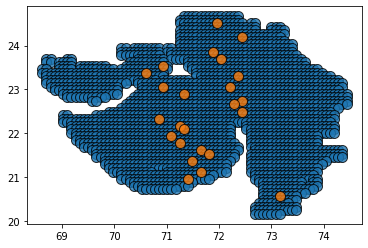

In [82]:
lat = db['Latitude']
lon = db['Longitude']
plt.scatter(lon, lat, s=100, edgecolor='k', alpha=0.8)
plt.scatter(ref_lon, ref_lat, s=100, edgecolor='k', alpha=0.8)
plt.show()

In [83]:
def getRefineryLocations(locations, refineries=1):
    size = len(db)
    st = db['Index'].iloc[0]           # Use .iloc[0] to access the first element of the 'Index' column
    en = db['Index'].iloc[size - 1]
    min_cost = 1e6
    best_loc = 0
    for i in range(st, en+1):
        curr_cost = 0
        for j in locations:
            curr_cost += dm[i][j]
        if curr_cost < min_cost:
            min_cost = curr_cost
            best_loc = i
    return best_loc, min_cost

In [114]:
def getOptimalResultsRef(location, ind=4):
    locs = []
    costs = []
    areas = np.array_split(location, ind)
    for i in range(0, ind):
        loc, cost = getRefineryLocations(areas[i], 1)
        costs.append(cost)
        locs.append(loc)
    return locs, costs

In [115]:
locs, costs = getOptimalResultsRef(optimal_result[0], 5)
print(locs)
print(np.sum(costs))

[214, 864, 1111, 1700, 2173]
2015.0265999999997


In [116]:
ref_coordinates = extract_coorindates(locs)
print(ref_coordinates[0])

[[23.94278, 22.97557, 22.65317, 21.84717, 21.12176], [71.80919, 71.17219, 72.20732, 71.25181, 71.57031]]


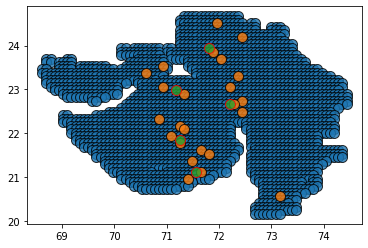

In [117]:
lat = db['Latitude']
lon = db['Longitude']
plt.scatter(lon, lat, s=100, edgecolor='k', alpha=0.8)
plt.scatter(coordinates[0][1], coordinates[0][0], s=100, edgecolor='k', alpha=0.8)
plt.scatter(ref_coordinates[0][1], ref_coordinates[0][0], s=100, edgecolor='r', alpha=0.8)
plt.show()  

In [118]:
cost_transport_to_refinery = np.sum(costs)

In [120]:
a = 0.001

In [121]:
overall_transport_cost = cost_transport_to_depot + cost_transport_to_refinery
a*overall_transport_cost

405.6025409